1. Define an approach you would take to solve the problem and document it

    .... To solve the problem of predicting insurance charges based on given features such as age, sex, BMI, children, smoker status, and region, we can use a machine learning model. Below is an outline of the steps you could take:
    
    ==== Data Understanding
    ==== Preprocessing
    ==== Split the Data
    ==== Model Selection
    ==== Training
    ==== Evaluation
    ==== Interpretation
    ==== Improvement
    ==== Deployment

2. Get the data and determine what type of machine learning problem it is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
in_df = pd.read_csv('insurance.csv')

In [3]:
in_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*** This is a Regression problem. Regression involves predicting a continuous outcome, in this case, 'charges'.

In [4]:
in_df.shape

(1338, 7)

In [5]:
columns = [i for i in in_df.columns]

In [6]:
columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Using an AI tool, we were able to generate the data dictionary:
  
  *** age: Age of the insured (Type: integer)
  
  *** sex: Gender of the insured (Type: categorical (Male/Female))
  
  *** bmi: Body Mass Index (BMI) of the insured (Type: float)
  
  *** children: Number of children/dependents covered (Type: integer)
  
  *** smoker: Whether the insured is a smoker (Type: categorical (Yes/No))
  
  *** region: Geographic region of the insured (Type: categorical (Northeast, Southeast, Southwest, Northwest))
  
  *** charges: Medical charges billed (Type: float)

In [7]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
in_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
cat = in_df.select_dtypes(include=['category', 'object'])
cat_columns = [i for i in cat.columns]

In [10]:
cat_columns

['sex', 'smoker', 'region']

In [11]:
for i in cat_columns:
    print('-------------------------------')
    print('-------------------------------')
    print(in_df[i].value_counts())

-------------------------------
-------------------------------
sex
male      676
female    662
Name: count, dtype: int64
-------------------------------
-------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64
-------------------------------
-------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [12]:
in_df['sex'] = in_df['sex'].astype('category')
in_df['smoker'] = in_df['smoker'].astype('category')
in_df['region'] = in_df['region'].astype('category')

In [13]:
print(in_df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [14]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


3. Outline possible algorithms you would use to create the model. 

   *** Linear Regression
   *** Decision Trees
   *** Random Forest
   *** Gradient Boosting Regressor
   *** XGBoost
   *** Lasso Regression
   *** Ridge Regression
   *** Support Vector Regression (SVR)
   *** Neural Networks

4. Conduct exploratory analysis to understand the distribution of variables, identify any correlations, and gain insights into the dataset.

In [15]:
in_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
in_df.duplicated().sum()

1

In [17]:
in_df = in_df.drop_duplicates()

In [18]:
in_df.duplicated().sum()

0

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state = 42)

In [20]:
X.shape

(100, 1)

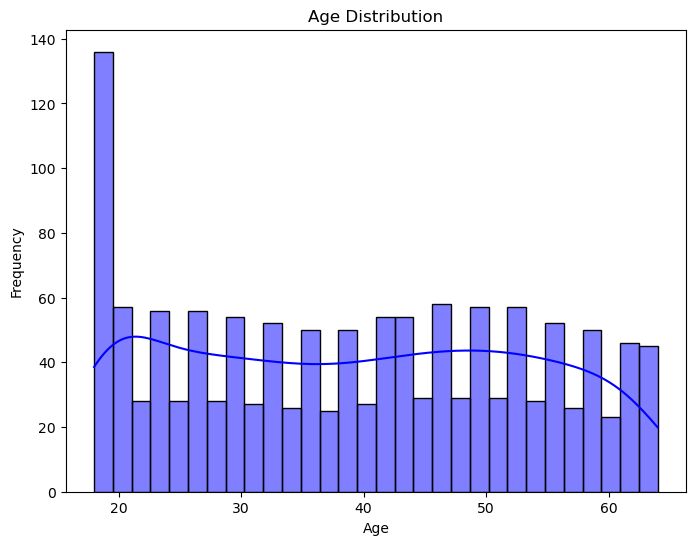

In [21]:
plt.figure(figsize=(8, 6))   # Histogram for 'Age'
sns.histplot(in_df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

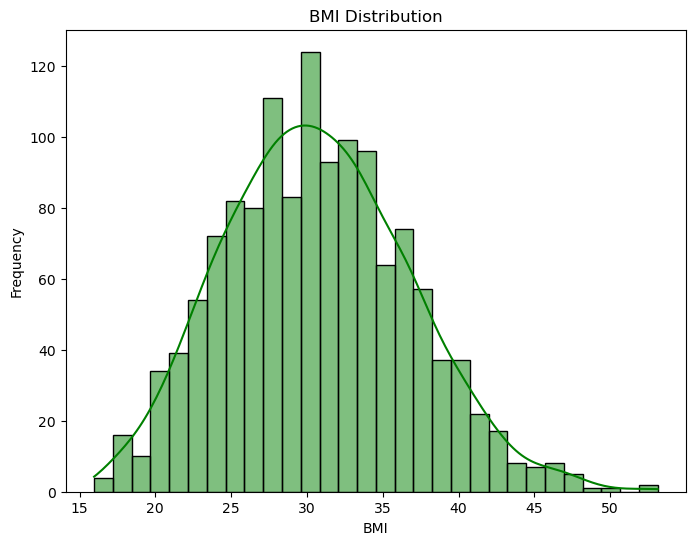

In [22]:
plt.figure(figsize=(8, 6))   # Histogram for 'Bmi'
sns.histplot(in_df['bmi'], bins=30, kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

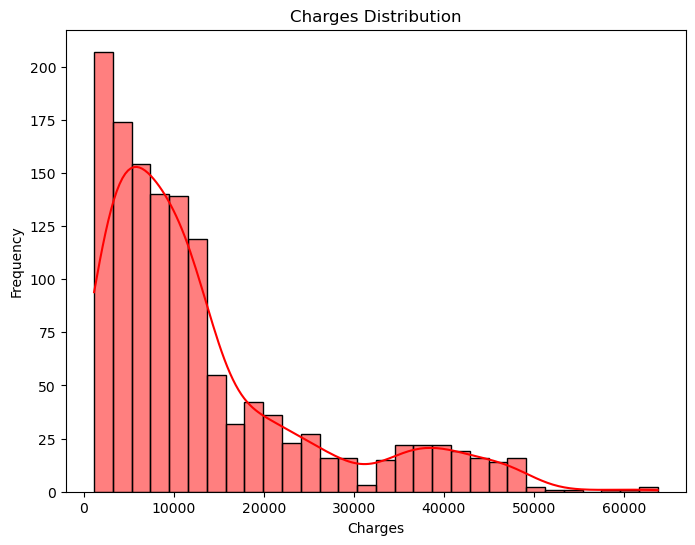

In [23]:
plt.figure(figsize=(8, 6))  # Histogram for 'Charges'
sns.histplot(in_df['charges'], bins=30, kde=True, color='red')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

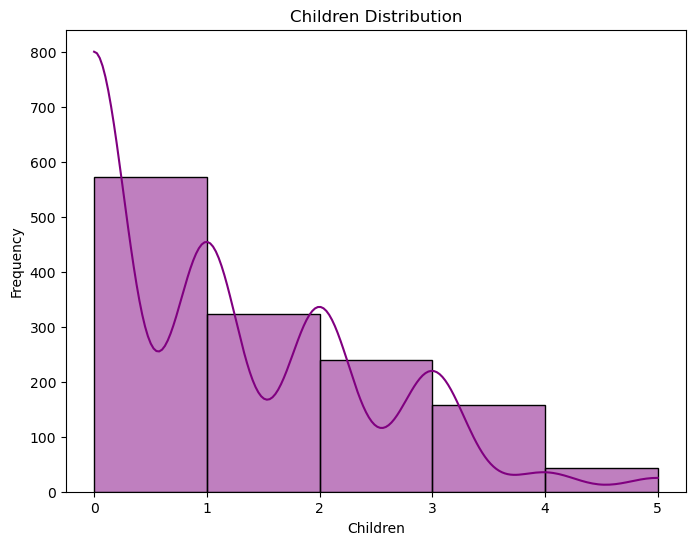

In [24]:
plt.figure(figsize=(8, 6))  # Histogram for 'Children'
sns.histplot(in_df['children'], bins=5, kde=True, color='purple')
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()

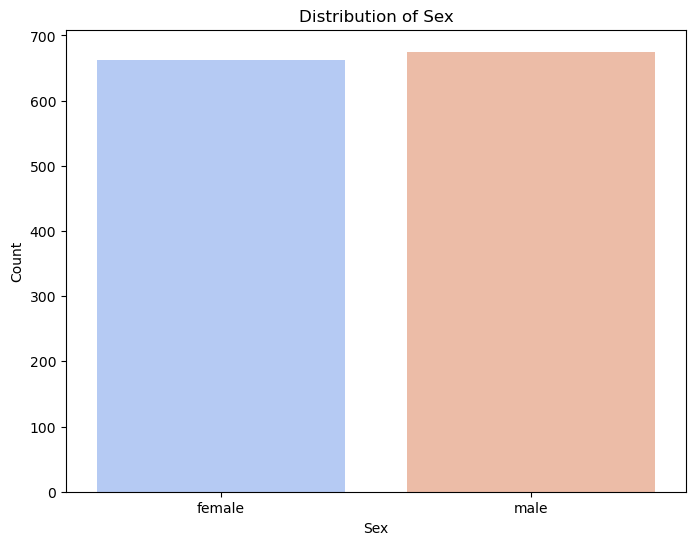

In [25]:
plt.figure(figsize=(8, 6))  # Count plot for 'Sex'
sns.countplot(x='sex', data=in_df, palette='coolwarm')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

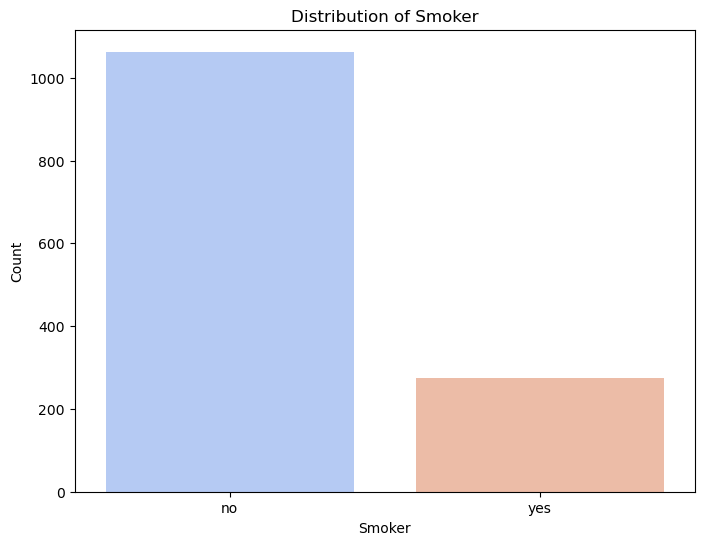

In [26]:
plt.figure(figsize=(8, 6))  # Count plot for 'Smoker'
sns.countplot(x='smoker', data=in_df, palette='coolwarm')
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

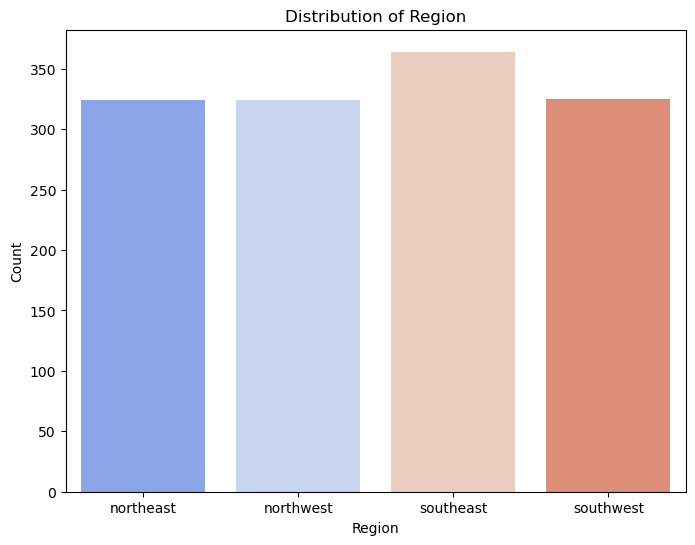

In [27]:
plt.figure(figsize=(8, 6))  # Count plot for 'Region'
sns.countplot(x='region', data=in_df, palette='coolwarm')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [28]:
numerical_data = in_df[['age', 'bmi', 'charges', 'children']]

correlation_matrix = numerical_data.corr()    # Compute the correlation matrix

print(correlation_matrix)

               age       bmi   charges  children
age       1.000000  0.109344  0.298308  0.041536
bmi       0.109344  1.000000  0.198401  0.012755
charges   0.298308  0.198401  1.000000  0.067389
children  0.041536  0.012755  0.067389  1.000000


***The correlation between 'age' and 'bmi' is approximately 0.109.
***The correlation between 'age' and 'charges' is approximately 0.298.
***The correlation between 'age' and 'children' is approximately 0.042.
***The correlation between 'bmi' and 'charges' is approximately 0.198.
***The correlation between 'bmi' and 'children' is approximately 0.013.
***The correlation between 'charges' and 'children' is approximately 0.067.
***The values in the correlation matrix range from -1 to 1:

***A value of 1 means a perfect positive correlation, i.e., as one variable increases, the other variable increases.
***A value of -1 means a perfect negative correlation, i.e., as one variable increases, the other variable decreases.
***A value close to 0 means no linear relationship between the two variables.
***Based on these values, i can interpret the following:

***There is a weak positive correlation (0.109) between 'age' and 'bmi'.
***There is a moderate positive correlation (0.298) between 'age' and 'charges'.
***There is a weak positive correlation (0.042) between 'age' and 'children'.
***There is a weak positive correlation (0.198) between 'bmi' and 'charges'.
***There is a weak positive correlation (0.013) between 'bmi' and 'children'.
***There is a weak positive correlation (0.067) between 'charges' and 'children'.

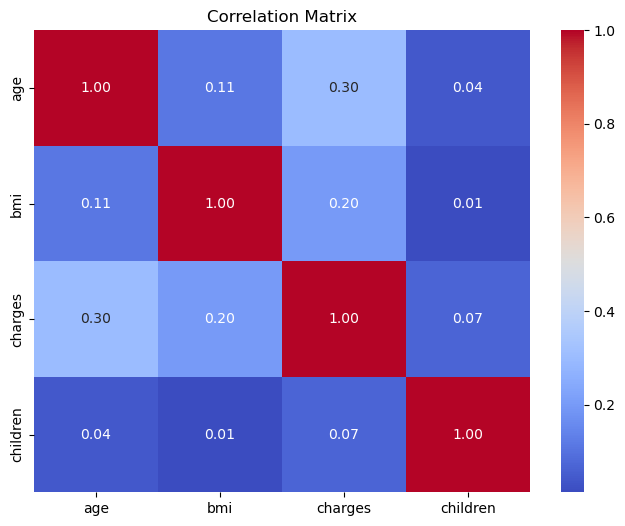

In [29]:
numerical_data = in_df[['age', 'bmi', 'charges', 'children']]  # Create the heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

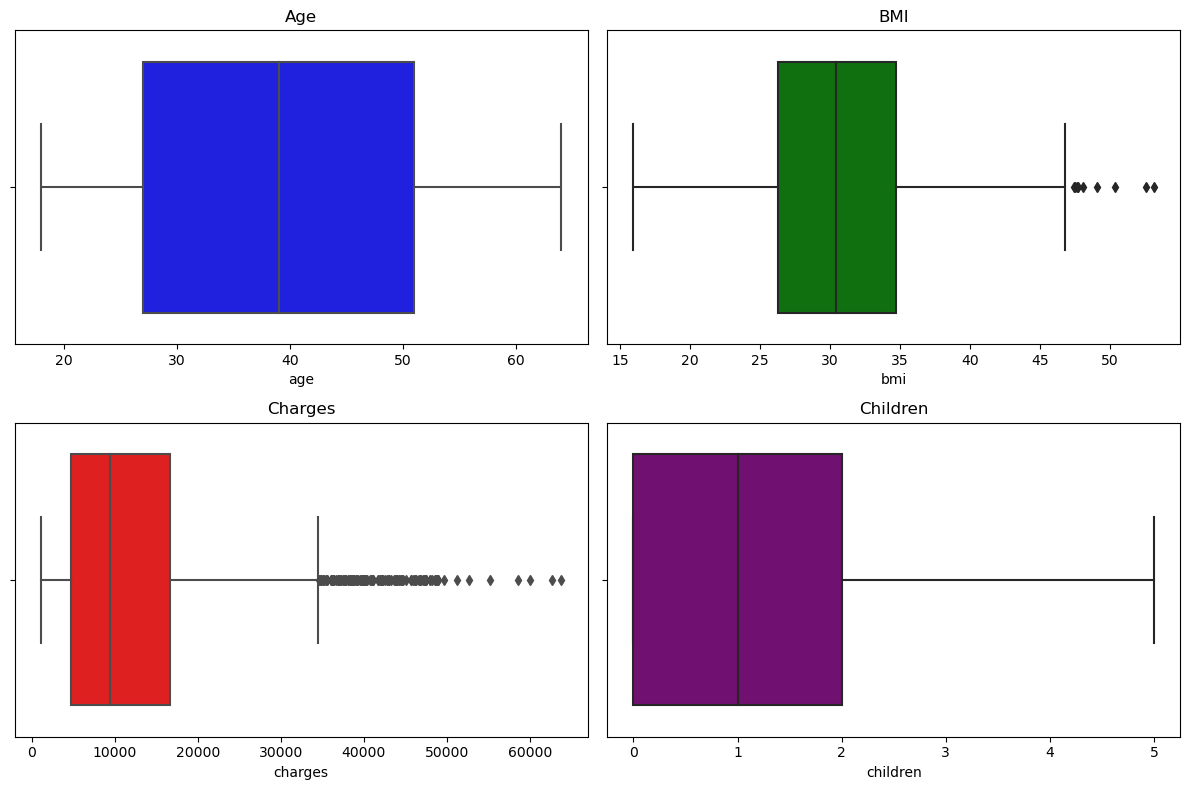

In [30]:
numerical_data = in_df[['age', 'bmi', 'charges', 'children']]  # Detecting potential outliers in the numerical features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=numerical_data['age'], color='blue')
plt.title('Age')

plt.subplot(2, 2, 2)
sns.boxplot(x=numerical_data['bmi'], color='green')
plt.title('BMI')

plt.subplot(2, 2, 3)
sns.boxplot(x=numerical_data['charges'], color='red')
plt.title('Charges')

plt.subplot(2, 2, 4)
sns.boxplot(x=numerical_data['children'], color='purple')
plt.title('Children')

plt.tight_layout()
plt.show()

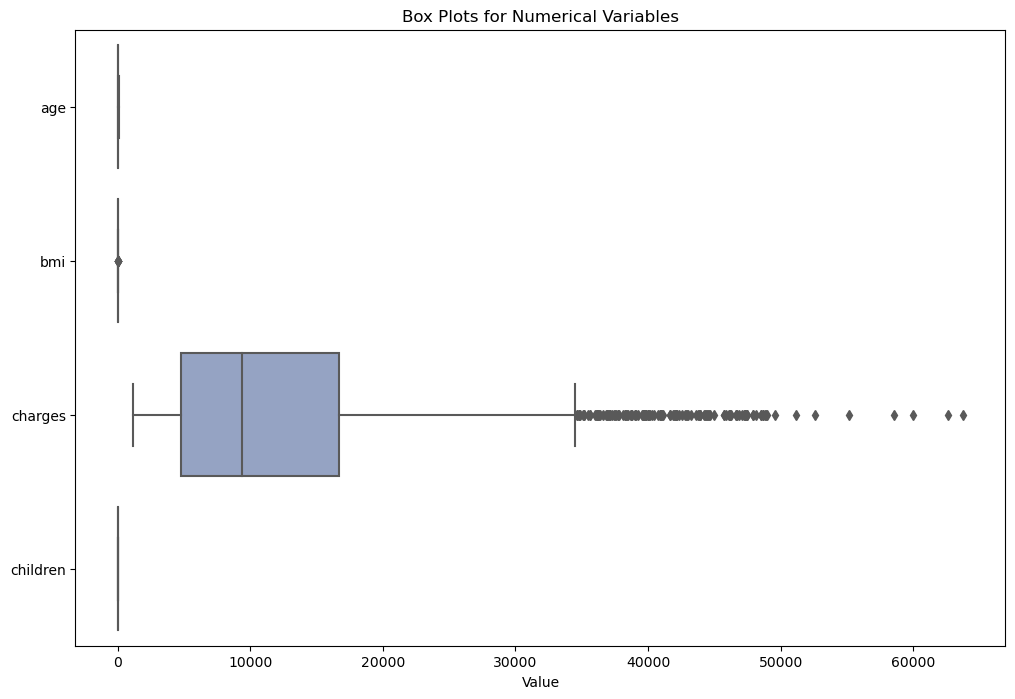

In [31]:
numerical_data = in_df[['age', 'bmi', 'charges', 'children']]  # Box Plots for Numerical Variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data, orient='h', palette='Set2')
plt.title('Box Plots for Numerical Variables')
plt.xlabel('Value')
plt.show()

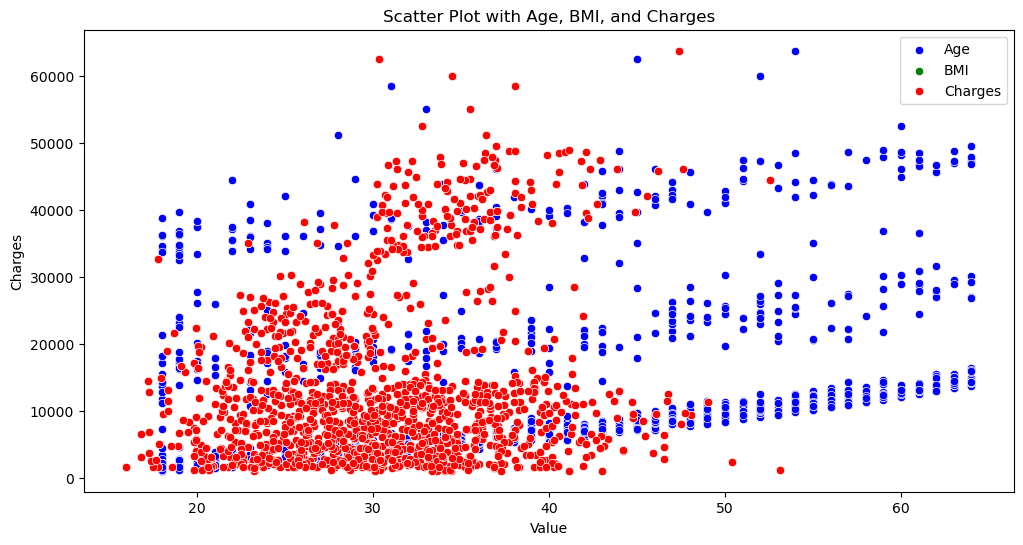

In [32]:
plt.figure(figsize=(12, 6))   # trend or pattern

sns.scatterplot(x='age', y='charges', data=in_df, color='blue', label='Age')
sns.scatterplot(x='bmi', y='charges', data=in_df, color='green', label='BMI')
sns.scatterplot(x='bmi', y='charges', data=in_df, color='red', label='Charges')

plt.title('Scatter Plot with Age, BMI, and Charges')
plt.xlabel('Value')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [33]:
print(in_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


5. Handle missing values, encode categorical variables, and scale numerical features if necessary.

In [34]:
missing_values = in_df.isna()
missing_values_count = missing_values.sum()
print(missing_values_count)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [35]:
in_df = pd.get_dummies(in_df, columns=['sex'], drop_first=True)  # One-hot encode 'sex' column

in_df = pd.get_dummies(in_df, columns=['smoker'], drop_first=True)   # One-hot encode 'smoker' column

in_df = pd.get_dummies(in_df, columns=['region'], drop_first=True)     # One-hot encode 'region' column

In [36]:
print(in_df.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [37]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'bmi', 'charges']   # Select numerical columns to scale

scaler = StandardScaler()         # Initialize the scaler

in_df[numerical_columns] = scaler.fit_transform(in_df[numerical_columns])     # Scale the numerical columns

In [38]:
print(in_df.head())

        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.440418 -0.453160         0  0.297857     False        True   
1 -1.511647  0.509422         1 -0.954381      True       False   
2 -0.799350  0.383155         3 -0.729373      True       False   
3 -0.443201 -1.305052         0  0.719104      True       False   
4 -0.514431 -0.292456         0 -0.777499      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


***6. Extract additional features if needed, such as interaction terms or polynomial features.

In [39]:
in_df['age_bmi_interaction'] = in_df['age'] * in_df['bmi']   # Create interaction terms for 'age' and 'bmi'

In [40]:
print(in_df.head())

        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.440418 -0.453160         0  0.297857     False        True   
1 -1.511647  0.509422         1 -0.954381      True       False   
2 -0.799350  0.383155         3 -0.729373      True       False   
3 -0.443201 -1.305052         0  0.719104      True       False   
4 -0.514431 -0.292456         0 -0.777499      True       False   

   region_northwest  region_southeast  region_southwest  age_bmi_interaction  
0             False             False              True             0.652739  
1             False              True             False            -0.770066  
2             False              True             False            -0.306275  
3              True             False             False             0.578401  
4              True             False             False             0.150449  


In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)   # Create polynomial features for 'age' and 'bmi' up to degree 2
poly_features = poly.fit_transform(in_df[['age', 'bmi']])
in_df['age_poly'] = poly_features[:, 0]
in_df['bmi_poly'] = poly_features[:, 1]

In [42]:
print(in_df.head())

        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.440418 -0.453160         0  0.297857     False        True   
1 -1.511647  0.509422         1 -0.954381      True       False   
2 -0.799350  0.383155         3 -0.729373      True       False   
3 -0.443201 -1.305052         0  0.719104      True       False   
4 -0.514431 -0.292456         0 -0.777499      True       False   

   region_northwest  region_southeast  region_southwest  age_bmi_interaction  \
0             False             False              True             0.652739   
1             False              True             False            -0.770066   
2             False              True             False            -0.306275   
3              True             False             False             0.578401   
4              True             False             False             0.150449   

   age_poly  bmi_poly  
0 -1.440418 -0.453160  
1 -1.511647  0.509422  
2 -0.799350  0.383155  
3 -0.443201 -1.30505

In [43]:
print(in_df.columns)

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_bmi_interaction', 'age_poly', 'bmi_poly'],
      dtype='object')


***7. Evaluate different regression algorithms (e.g., linear regression, decision tree regression, random forest regression, etc.) and select the one with the best

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
X = in_df.drop(columns=['charges'])
y = in_df['charges']

In [46]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

In [47]:
# Evaluate Linear Regression
linear_reg_scores = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
linear_reg_rmse = np.sqrt(-linear_reg_scores).mean()

# Evaluate Decision Tree Regression
decision_tree_scores = cross_val_score(decision_tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
decision_tree_rmse = np.sqrt(-decision_tree_scores).mean()

# Evaluate Random Forest Regression
random_forest_scores = cross_val_score(random_forest_reg, X, y, cv=5, scoring='neg_mean_squared_error')
random_forest_rmse = np.sqrt(-random_forest_scores).mean()

In [48]:
print(f'Linear Regression RMSE: {linear_reg_rmse:.2f}')
print(f'Decision Tree RMSE: {decision_tree_rmse:.2f}')
print(f'Random Forest RMSE: {random_forest_rmse:.2f}')

best_model = min(linear_reg_rmse, decision_tree_rmse, random_forest_rmse)
if best_model == linear_reg_rmse:
    print('Linear Regression is the best model.')
elif best_model == decision_tree_rmse:
    print('Decision Tree Regression is the best model.')
else:
    print('Random Forest Regression is the best model.')

Linear Regression RMSE: 0.50
Decision Tree RMSE: 0.53
Random Forest RMSE: 0.40
Random Forest Regression is the best model.
